# NLP: PREDICTING WITH  THE ARTICLE CONTENT

- Predicting the online new items popularity with the article content:

    > - I have extracted the information from the website using Web scrape and the URLs.Due to the difficulty of a computer resources for running a large number of rows, the analysis is based on 1000 rows.
    
    > -  I implemented Natural Language Processing techniques to create features extracted from the Body and Title using TF-IDF, plus filtering using Select K best, and then applied machine learning algorithms such as Naive Bayes and Random Forest. 

In [1]:
#!pip install nltk
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#stpwds = stopwords.words('english')
#print (stpwds)
#!pip install selenium

In [2]:
import pandas as pd
import numpy as np
import requests
import bs4
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords

stop = stopwords.words('english')

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException



#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [3]:
# Load file
df = pd.read_csv('./df.csv')

In [4]:
# As some rows were removed, df index has to be reseted
df.reset_index(inplace=True)

In [5]:
len(df)

38818

In [6]:
df.tail(2)

index                                                url  timedelta  \
38816  39642     http://mashable.com/2014/12/27/ukraine-blasts/        8.0   
38817  39643  http://mashable.com/2014/12/27/youtube-channel...        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
38816             6.0             682.0         0.539493               1.0   
38817            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
38816                  0.692661       10.0             1.0  ...   
38817                  0.846154        1.0             1.0  ...   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
38816                   -0.5                -0.0125            0.000000   
38817                   -0.2                -0.2000            0.333333   

       title_sentiment_polarity  abs_title_subjectivity  \
38816                      0.00                0.500000   
38817                      0.25                0.166667   

       abs_title_sentiment_polarity  shares  shares_log         y  y_c  
38816                          0.00    1100    7.003974  7.003974    0  
38817                          0.25    1300    7.170888  7.170888    0  

[2 rows x 65 columns]

In [7]:
r_df = df.iloc[:200,:]
r_df.head()

# create a new column, called raw_html
htmls = []  
for url in r_df.url:
    text = requests.get(url).text  # text URL 
    htmls.append(text)

len(htmls)
raw_html_df = pd.DataFrame(htmls, columns=['raw_html'])
r_df_with_html = pd.concat([r_df, raw_html_df], axis=1, join="inner")

index                                                url  timedelta  \
0      0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2      2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3      3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4      4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   
2                  0.663866        3.0             1.0  ...   
3                  0.665635        9.0             0.0  ...   
4                  0.540890       19.0            19.0  ...   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_log         y  y_c  
0                      0.187500     593    6.386879  6.386879    0  
1                      0.000000     711    6.568078  6.568078    0  
2                      0.000000    1500    7.313887  7.313887    1  
3                      0.000000    1200    7.090910  7.090910    0  
4                      0.136364     505    6.226537  6.226537    0  

[5 rows x 65 columns]

200

In [8]:
# Save the file
df.to_csv('./Df_data_with_html.csv', encoding='utf-8',index_label= True)

In [9]:
# Create a new column with title and body text
import numpy as np
r_df_with_html['title'] = np.nan
r_df_with_html['body'] = np.nan

titles = []
bodies = []
for html in r_df_with_html['raw_html']:
    soup = BeautifulSoup(html, "lxml")  # we need to convert this into a soup object
    titles.append(soup.title.text)
    bodies.append(soup.body.text)

r_df_with_html['title'] = titles
r_df_with_html['body'] = bodies

In [10]:
# Clean body
r_df_with_html['body_1'] = r_df_with_html['body'].apply(lambda x: x.split('UTC\n\n\n')[0]\
                                        .split('\n\n\nTopics:')[0])

In [11]:
r_df_with_html.head(2)

index                                                url  timedelta  \
0      0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   

   abs_title_subjectivity  abs_title_sentiment_polarity  shares  shares_log  \
0                     0.0                        0.1875     593    6.386879   
1                     0.5                        0.0000     711    6.568078   

          y  y_c                                           raw_html  \
0  6.386879    0  <!doctype html>\n<html lang="en">\n<head>\n<ti...   
1  6.568078    0  <!doctype html>\n<html lang="en">\n<head>\n<ti...   

                                               title  \
0  Amazon's Streaming Video Library Now a Little ...   
1  AP's Twitter to Begin Displaying Sponsored Twe...   

                                                body  \
0  \n\n\n\n $refs.firstMenuItem.focus());" class=...   
1  \n\n\n\n $refs.firstMenuItem.focus());" class=...   

                                              body_1  
0  \n\n\n\n $refs.firstMenuItem.focus());" class=...  
1  \n\n\n\n $refs.firstMenuItem.focus());" class=...  

[2 rows x 69 columns]

In [12]:
# Function to create column popularity
# median target = 7.24
def noticia_popular(shares_log):
    target = 0
    if shares_log > 7.24:
        target = 1         
    return target
r_df_with_html['popular'] = r_df_with_html['shares_log'].map(noticia_popular)

In [13]:
# Clean and change the name 
raw_features = r_df_with_html.copy()
raw_features['cleaned_body'] = raw_features['body_1']
raw_features.drop('body_1', inplace=True, axis=1)

In [14]:
raw_features.shape

(200, 70)

In [15]:
#Definition target
y_c = raw_features['popular']

#### Applying TF-IDF 
#### Features extracted from the title, plus filtering using Select K best

Now trying to find words that are characteristic of certain documents using the TfidfVectorizer class in scikit-learn. This would create a tfidf matrix with all the words and their scores in all the documents. 

In [16]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer

title_vect = TfidfVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)
Xtitle = title_vect.fit_transform(raw_features['title'])
#title_feature_names = ['title_' + feature_name for feature_name in title_vect.get_feature_names()]
title_feature_names = ['title_' + feature_name for feature_name in title_vect.get_feature_names_out()]
Xtitle = pd.DataFrame(data=Xtitle.todense(), columns=title_feature_names)

In [17]:
#SelectKBest - Select features according to the k highest scores. K indicate the number of top features to select. 
# K limit to 115 words

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=115).fit(Xtitle, y_c)
idxs_selected = selector.get_support(indices=True)
Xtitle_reduced = Xtitle.iloc[:,idxs_selected]

In [18]:
Xtitle_reduced.shape

(200, 115)

In [19]:
Xtitle_reduced.head()

title_000  title_17  title_200  title_2013  title_4k  title_access  \
0        0.0       0.0        0.0         0.0       0.0           0.0   
1        0.0       0.0        0.0         0.0       0.0           0.0   
2        0.0       0.0        0.0         0.0       0.0           0.0   
3        0.0       0.0        0.0         0.0       0.0           0.0   
4        0.0       0.0        0.0         0.0       0.0           0.0   

   title_answer  title_apps  title_arrested  title_awesome  ...  \
0           0.0    0.000000             0.0            0.0  ...   
1           0.0    0.000000             0.0            0.0  ...   
2           0.0    0.000000             0.0            0.0  ...   
3           0.0    0.000000             0.0            0.0  ...   
4           0.0    0.347427             0.0            0.0  ...   

   title_twitter  title_umbrella  title_upgrade  title_use  title_users  \
0        0.00000             0.0            0.0        0.0          0.0   
1        0.32223             0.0            0.0        0.0          0.0   
2        0.00000             0.0            0.0        0.0          0.0   
3        0.00000             0.0            0.0        0.0          0.0   
4        0.00000             0.0            0.0        0.0          0.0   

   title_vii  title_waterproof  title_way  title_ways  title_year  
0        0.0               0.0        0.0         0.0         0.0  
1        0.0               0.0        0.0         0.0         0.0  
2        0.0               0.0        0.0         0.0         0.0  
3        0.0               0.0        0.0         0.0         0.0  
4        0.0               0.0        0.0         0.0         0.0  

[5 rows x 115 columns]

So now we are filtering using Select K best according to the K equal to 500 highest scores. I was applying score function parameter chi2 given that this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. 


In [20]:
body_vect = TfidfVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)
Xbody = body_vect.fit_transform(raw_features['cleaned_body'])
body_feature_names = ['body_' + feature_name for feature_name in body_vect.get_feature_names_out()]
Xbody = pd.DataFrame(data=Xbody.todense(), columns=body_feature_names)

In [21]:
# K limit to 500 words
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=500).fit(Xbody, y_c)
idxs_selected = selector.get_support(indices=True)
Xbody_reduced = Xbody.iloc[:,idxs_selected]

In [22]:
Xbody_reduced.shape
Xbody_reduced.head()

(200, 500)

body_1080p  body_13  body_15  body_150th  body_16gb  body_17  body_18  \
0         0.0      0.0      0.0         0.0        0.0      0.0      0.0   
1         0.0      0.0      0.0         0.0        0.0      0.0      0.0   
2         0.0      0.0      0.0         0.0        0.0      0.0      0.0   
3         0.0      0.0      0.0         0.0        0.0      0.0      0.0   
4         0.0      0.0      0.0         0.0        0.0      0.0      0.0   

   body_3g  body_47  body_4chan  ...  body_white  body_windows  body_winning  \
0      0.0      0.0         0.0  ...         0.0           0.0           0.0   
1      0.0      0.0         0.0  ...         0.0           0.0           0.0   
2      0.0      0.0         0.0  ...         0.0           0.0           0.0   
3      0.0      0.0         0.0  ...         0.0           0.0           0.0   
4      0.0      0.0         0.0  ...         0.0           0.0           0.0   

   body_winter  body_wipprecht  body_withings  body_wonderful  body_world  \
0          0.0             0.0            0.0             0.0    0.000000   
1          0.0             0.0            0.0             0.0    0.000000   
2          0.0             0.0            0.0             0.0    0.039661   
3          0.0             0.0            0.0             0.0    0.000000   
4          0.0             0.0            0.0             0.0    0.000000   

   body_wtf  body_youtube  
0       0.0           0.0  
1       0.0           0.0  
2       0.0           0.0  
3       0.0           0.0  
4       0.0           0.0  

[5 rows x 500 columns]

In [23]:
# Join initial DataFrame Xraw and features extracted from body and title
#X = pd.concat([raw_features, Xtitle_reduced, Xbody_reduced], axis=1)
X = pd.concat([Xtitle_reduced, Xbody_reduced], axis=1)
#X.drop(['title', 'cleaned_body'], inplace=True, axis=1)

In [24]:
X.shape

(200, 615)

In [25]:
X.head()

title_000  title_17  title_200  title_2013  title_4k  title_access  \
0        0.0       0.0        0.0         0.0       0.0           0.0   
1        0.0       0.0        0.0         0.0       0.0           0.0   
2        0.0       0.0        0.0         0.0       0.0           0.0   
3        0.0       0.0        0.0         0.0       0.0           0.0   
4        0.0       0.0        0.0         0.0       0.0           0.0   

   title_answer  title_apps  title_arrested  title_awesome  ...  body_white  \
0           0.0    0.000000             0.0            0.0  ...         0.0   
1           0.0    0.000000             0.0            0.0  ...         0.0   
2           0.0    0.000000             0.0            0.0  ...         0.0   
3           0.0    0.000000             0.0            0.0  ...         0.0   
4           0.0    0.347427             0.0            0.0  ...         0.0   

   body_windows  body_winning  body_winter  body_wipprecht  body_withings  \
0           0.0           0.0          0.0             0.0            0.0   
1           0.0           0.0          0.0             0.0            0.0   
2           0.0           0.0          0.0             0.0            0.0   
3           0.0           0.0          0.0             0.0            0.0   
4           0.0           0.0          0.0             0.0            0.0   

   body_wonderful  body_world  body_wtf  body_youtube  
0             0.0    0.000000       0.0           0.0  
1             0.0    0.000000       0.0           0.0  
2             0.0    0.039661       0.0           0.0  
3             0.0    0.000000       0.0           0.0  
4             0.0    0.000000       0.0           0.0  

[5 rows x 615 columns]

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

MinMaxScaler,This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one. My dataset contains attributes with a mixtures of scales, with negative values.

In [26]:
# Standarization

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)
Xstd_new = pd.DataFrame(Xstd, columns=X.columns)

scaler1 = MinMaxScaler()
Xstd1 = scaler1.fit_transform(X)
Xstd_new1 = pd.DataFrame(Xstd1, columns=X.columns)

# Modeling

> I implemented machine learning algorithms like Naïve Bayes. In addition, I applied Logistic Regression and Random Forest algorithms. As we have seen before, the benefits of Random Forest algorithm and easy to learn and use.

In [27]:
#Calculate baseline accuracy
baseline_acc = np.mean(y_c)
print("Baseline accuracy:", round (baseline_acc,3))

Baseline accuracy: 0.44


In [28]:
### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict, cross_val_score
##### Xtr = Xtrain, Xte = XTest, ytr = YTrain, yte = YTest
Xtr, Xte, ytr, yte = train_test_split(Xstd_new, y_c, test_size = 0.2, random_state = 200)

### GS Logistic Regression

In [29]:
# optimize a logistic regression function by using a grid parameter search
logit = LogisticRegression(C=1, penalty='l1', solver='liblinear')
logit_parameters = {'penalty':['l1'], 'C':np.logspace(-3, 3, 10)}

In [30]:
logit_clf = GridSearchCV(logit, logit_parameters, cv=5, n_jobs=-1,scoring='accuracy')
#LogisticRegression(), tuned_parameters, cv=3, n_jobs=-1,scoring='accuracy'

In [31]:
#!pip install install scikit-learn==0.21.2

In [32]:
accuracy = cross_val_score(logit_clf,Xstd_new,y_c,cv=5,error_score='raise')

In [33]:



logit_clf.fit(X,y_c)
round (logit_clf.best_score_,3)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1']},
             scoring='accuracy')

0.68

In [34]:
round(logit_clf.best_estimator_.fit(Xtr,ytr).score(Xte,yte),3)

0.55

In [35]:
logit_clf.best_params_

{'C': 215.44346900318823, 'penalty': 'l1'}

In [36]:
coeffs = pd.DataFrame(logit_clf.best_estimator_.coef_, columns=Xstd_new.columns)
coeffs_t = coeffs.transpose()

In [37]:
coeffs_t.columns = ['GS_Logistic_Regression']
coeffs_abs = coeffs_t.abs().sort_values('GS_Logistic_Regression', ascending=False)

### Random Forest

Random forests is an ensemble learning method for classification, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc1 = RandomForestClassifier(random_state=37)
rfc1.fit(Xtr, ytr)
yhat_rfc1 = rfc1.predict(Xte)
print("Baseline accuracy:\t\t\t\t\t", baseline_acc)
print("Random Forest (default parameters) test accuracy:\t", accuracy_score(yte, yhat_rfc1))

RandomForestClassifier(random_state=37)

Baseline accuracy:					 0.44
Random Forest (default parameters) test accuracy:	 0.55


### Multinomial

Bayes’ theorem is based on conditional probability. The conditional probability helps us calculating the probability that something will happen, given that something else has already happened.

Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. Whereas simple naive Bayes would model a document as the presence and absence of particular words, multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in. 
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).

In [39]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Minmaxscale
Xtrain, Xtest, ytrain, ytest = train_test_split(Xstd_new1, y_c, test_size = 0.2, random_state = 200)

In [40]:
mnb = MultinomialNB()
mnb.fit(Xtrain,ytrain)
yhat_mnb = mnb.predict(Xtest)

print("Baseline accuracy:\t\t\t\t", baseline_acc)
print ("Multinomial (default parameters) test accuracy:\t", accuracy_score(ytest, yhat_mnb))

MultinomialNB()

Baseline accuracy:				 0.44
Multinomial (default parameters) test accuracy:	 0.85


## Bernoulli


Like Multinomial, this classifier is suitable for discrete data. The difference is that while Multinomial works with occurrence counts, Bernoulli is designed for binary/boolean features.

In [41]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
brn = BernoulliNB()
brn.fit(Xtrain,ytrain)
yhat_brn = brn.predict(Xtest)

print("Baseline accuracy:\t\t\t\t", baseline_acc)
print ("Multinomial (default parameters) test accuracy:\t", accuracy_score(ytest, yhat_brn))

BernoulliNB()

Baseline accuracy:				 0.44
Multinomial (default parameters) test accuracy:	 0.725


### Gaussian

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It’s specifically used when the features have continuous values. It’s also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [42]:
gaus = GaussianNB()
gaus.fit(Xtrain,ytrain)
yhat_gaus = gaus.predict(Xtest)

print ("Baseline accuracy:\t\t\t\t", baseline_acc)
print ("Multinomial (default parameters) test accuracy:\t", accuracy_score(ytest, yhat_gaus))

GaussianNB()

Baseline accuracy:				 0.44
Multinomial (default parameters) test accuracy:	 0.95


## Plot the ROC curve for Bayessians models



(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate (1 - Specificity)')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

Text(0.5, 1.0, 'ROC Curves for Logistic Regression and KNN(opt n)')

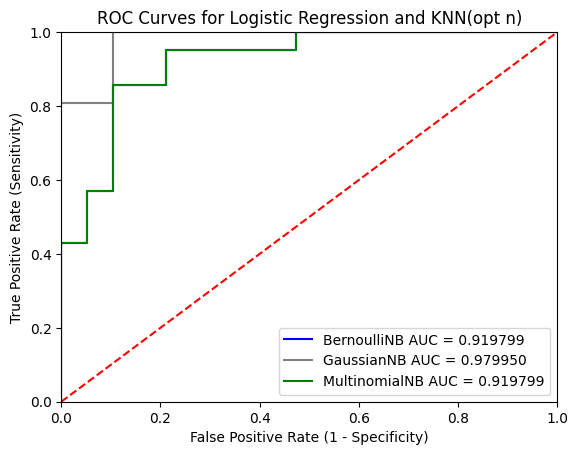

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,auc, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
predicted_prob_m = mnb.predict_proba(Xtest)
predicted_prob_b = brn.predict_proba(Xtest)
predicted_prob_g = gaus.predict_proba(Xtest)

# Plot the ROC curve
fpr_m, tpr_m, thresholds_m = metrics.roc_curve(ytest, predicted_prob_m[:,1])
auc_m = auc(fpr_m,tpr_m)
fpr_b, tpr_b, thresholds = metrics.roc_curve(ytest, predicted_prob_b[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
fpr, tpr, thresholds = metrics.roc_curve(ytest, predicted_prob_b[:,1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label='BernoulliNB AUC = %f' % roc_auc)
plt.plot(fpr_m, tpr_m, 'grey', label='GaussianNB AUC = %f' % auc_m) 
plt.plot(fpr_b, tpr_b, 'g', label='MultinomialNB AUC = %f' % roc_auc_b)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for Logistic Regression and KNN(opt n)')
plt.legend(loc='lower right')
plt.show()



In [44]:
#!pip install numpy

In [45]:
#import seaborn as sns;
###sns.set_theme()
#plt.figure(figsize = (20,8))


#D = {'GS LR(Opt)':0.835,'RF(Opt)':0.705,'Multinomial(Def)':0.857,    
  #  'Bernoulli(Def)':0.870, 'Gaussian(Def)':0.827}

#color = sns.diverging_palette(h_neg=10, h_pos=250, s=90, l=30, as_cmap=True, center="light",)
#color = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
#plt.bar(range(len(D)), D.values(),align='center', color = "b")
#plt.xticks(range(len(D)), D.keys())
#plt.axhline(0.551, label = 'Baseline Performance',lw=3, c='grey', alpha=1.0)
#plt.ylabel('Test Accuracy')
#plt.title('Model Performance Accuracy Score (Test) - NLP', fontsize = 25)
#print('Baseline Accuracy =  0.551 ', )
#plt.show()

# Function to plot the confusion matrix
#### Confussion Matrix - Best Model Bernoulli



In [46]:
import seaborn as sns
import itertools

# Function to plot the confusion matrices in a nicer and more interpretable way:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues, xlab='Predicted label',\
                         ylab='True label'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.show()

<Figure size 700x500 with 0 Axes>

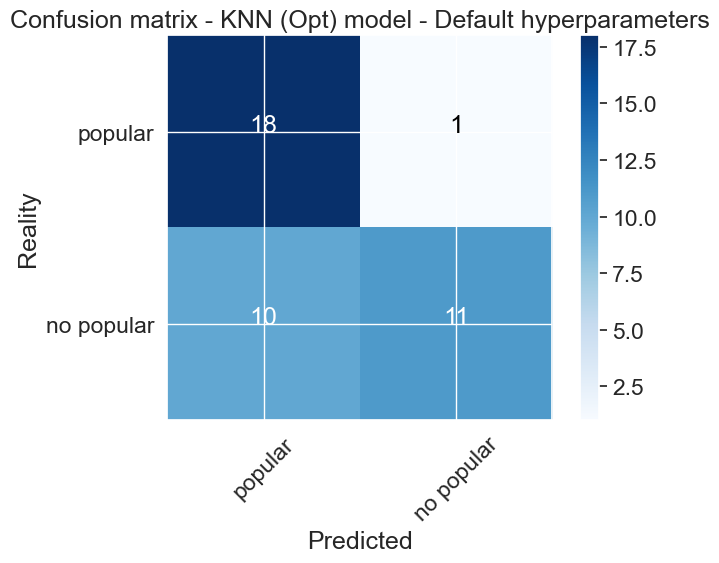

In [47]:
# Computing the confusion matrix for Bernoulli
confmat_mnb = confusion_matrix(ytest, yhat_brn)

# Plotting it using the function:
sns.set(font_scale=1.5)
plt.figure(figsize=(7,5))
plot_confusion_matrix(confmat_mnb, ['popular','no popular'],\
                      'Confusion matrix - KNN (Opt) model - Default hyperparameters',\
                      xlab='Predicted', ylab='Reality')
plt.show()

In [48]:
print(classification_report(ytest, yhat_brn))

              precision    recall  f1-score   support

           0       0.64      0.95      0.77        19
           1       0.92      0.52      0.67        21

    accuracy                           0.73        40
   macro avg       0.78      0.74      0.72        40
weighted avg       0.79      0.72      0.71        40



The F1-Score is robust because it shows an unweighted, fair measure for accuracy by taking the harmonic mean of precision and recall, reaching 0.85 with Bernoulli model. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.
The support is the number of samples of the true response that lie in that class.

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Precision-Recall Curve Multinomial')

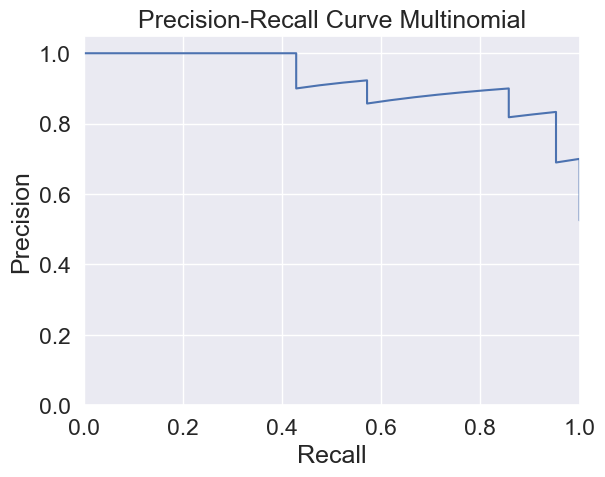

In [49]:
# Plot the Precision - Recall Curve

from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = metrics.precision_recall_curve(ytest, predicted_prob_b[:,1])
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('Precision-Recall Curve Multinomial')
plt.show()


> - The precision-recall curve of an almost perfect classifier - from the top left corner (0.0, 1.0) to the top right corner (1.0,0.8).

** Extracting directly all the words in an article as additional features, and then applying machine learning algorithms such as Naive Bayes substantially improved the accuracy of prediction regarding our previos exercise (0.87 Vs 0.65), the ROC Curve (0.95 Vs 0.67) and F1 score**

## Title Analysis

Sentimental analysis can prove a breakthrough for the title of the article. The key to running a successful article with the sentimental data is the ability to exploit the unstructured data for actionable insights.

Sentimental Analysis is the use of Natural Language Processing techniques to extract subjective information from a piece of text. i.e. whether an author is being subjective or objective or even positive or negative. (can also be referred to as Opinion Mining).

In [50]:
#!pip install vaderSentiment

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

###  Sentimental Analysis

- I used the VADER library to get better sentiment scores

- VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

- I parsed the text With `SentimentIntensityAnalyzer` 

In [52]:
analyzer = SentimentIntensityAnalyzer()
for sentence in titles:
    vs = analyzer.polarity_scores(sentence)

Through sentiment analysis, three new variables would be added:

> - There is a positive correlation between the social shares news and the score positive in the title

In [53]:
# Calculate the four scores for each review and save them as features in the dataframe
raw_features['vader_neg_t'] = 0
raw_features['vader_pos_t'] = 0
raw_features['vader_neu_t'] = 0
raw_features['vader_compound_t'] = 0

In [54]:
for i, q in enumerate(raw_features['title'].values):
    vs = analyzer.polarity_scores(q)
    raw_features.iloc[i, -4] = vs['neg']
    raw_features.iloc[i, -3] = vs['pos']
    raw_features.iloc[i, -2] = vs['neu']
    raw_features.iloc[i, -1] = vs['compound']

<Figure size 2000x400 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: xlabel='vader_neg_t', ylabel='shares_log'>

<AxesSubplot: >

<AxesSubplot: xlabel='vader_pos_t', ylabel='shares_log'>

<AxesSubplot: >

<AxesSubplot: xlabel='vader_neu_t', ylabel='shares_log'>

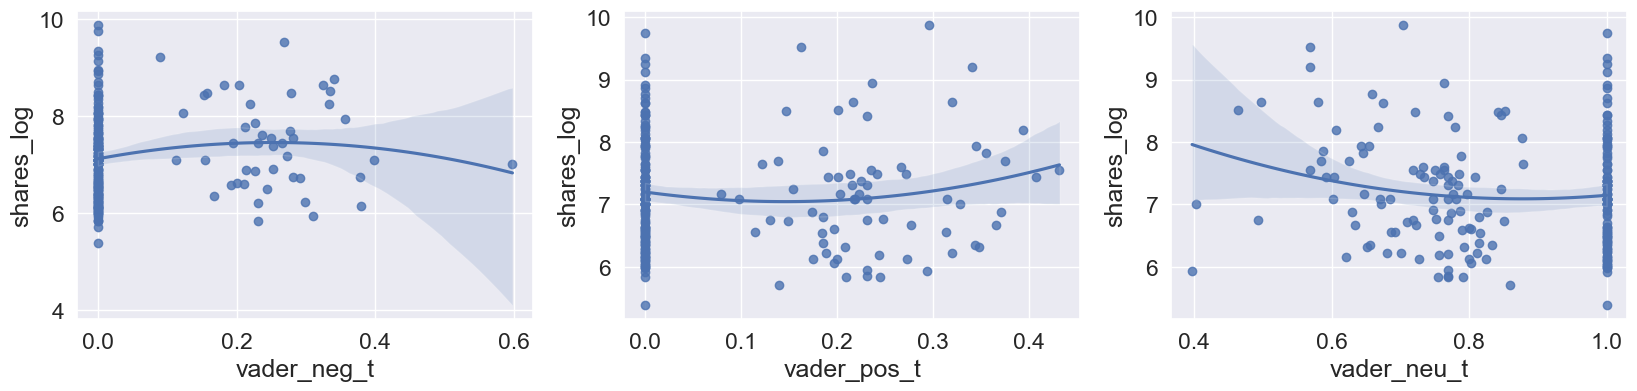

In [55]:
plt.figure(figsize=(20,4))
for i,var in enumerate(['vader_neg_t', 'vader_pos_t','vader_neu_t']):
    plt.subplot(1,3,i+1)
    sns.regplot(x = raw_features[var], y =raw_features['shares_log'], order=2)
plt.show()

<AxesSubplot: xlabel='vader_pos_t', ylabel='shares_log'>

Text(0.5, 1.0, 'Sentiment Score Positive en Title Vs Social Shares')

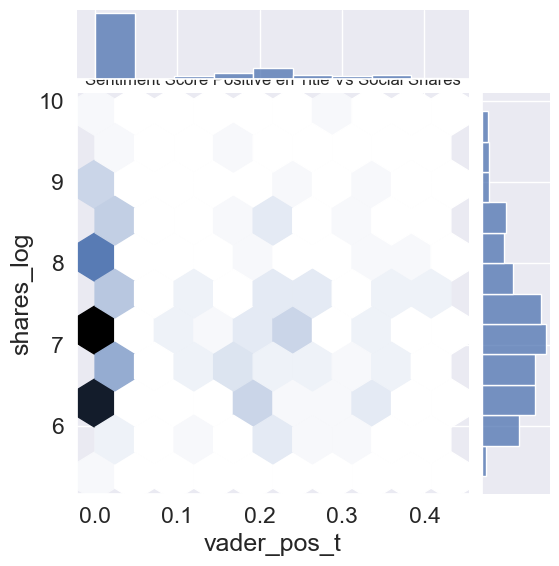

In [56]:
x = sns.jointplot(x =raw_features.vader_pos_t ,y = raw_features.shares_log , kind = 'hex')
x.fig.axes[0]
plt.title('Sentiment Score Positive en Title Vs Social Shares', fontsize = 12)
plt.show()

  >   - Surprisingly, there is a positive correlation between social shares of news stories and a score positive in the title: Between 20-40% of those which score positive in title are shared. (note the logarithmic scale for social shares).

Then, I decided to determine which characteristic is showing the titles with a large number of social shares.

In [57]:
# PROCESAMIENTO DEL TEXTO
ENGLISH_STOP_WORDS = ["rescue","tweet","bro","school"]
custom_stop_words = list(ENGLISH_STOP_WORDS)

# Use  TfidfVectorizer to transform the title text, taking out the stopwords. 
# With TfidfVectorizer, common words are penalized and rare words have more influence
vectorizer = TfidfVectorizer(stop_words=custom_stop_words)

X = vectorizer.fit_transform(raw_features['title']) 

In [58]:
X.todense().tolist()
a = zip(vectorizer.get_feature_names_out(),X.sum(axis=0).tolist()[0])

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.3099287442679156,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [59]:
raw_features_vect = pd.DataFrame(a, columns=['words','freq'])
raw_features_vect = pd.concat([raw_features_vect,r_df_with_html], axis=1)

#### Print out the top most negative, positive, neutral, and subjective features by VADER score



In [60]:
#Print out the top most negative, positive, neutral, and subjective features by VADER score
# NEGATIVE
raw_features.sort_values('vader_neg_t', ascending=False, inplace=True)
for i in range(10):
    print(raw_features.title.values[i])

Rage Comics Are Dying a Slow, Painful Death | Mashable
Man Recovers Stolen iPhone by Luring Thief Through Dating Site | Mashable
Japanese Cat Carries Clues to Bizarre Bomb Hacker Case | Mashable
HTC 4Q Profit Falls 91% as Brand Falls Behind in Smartphone Wars | Mashable
Student Refusing to Wear RFID Chip Loses in Court | Mashable
'Arrested Development' Returns in May | Mashable
'Walking Dead' Unveils New Poster and Teases Super Bowl Ad | Mashable
10 New Year's Resolution Failures | Mashable
Google: The Flu Is Coming! | Mashable
Baby Clothing Helps Prevent Infant Death | Mashable


In [61]:
# POSITIVE
raw_features.sort_values('vader_pos_t', ascending=False, inplace=True)
for i in range(10):
    print(raw_features.title.values[i])

Psy Bringing 'Gangnam Style' to Wonderful Pistachios Super Bowl Ad   | Mashable
Withings Smart Activity Tracker Is First to Record Heart Rate  | Mashable
Pin the Connected Living Room of Your Dreams and Win | Mashable
The Best Wedding RSVP Cards Ever  | Mashable
Bookacoach Helps You Find a Sports Coach You Can Trust | Mashable
This Android-Based Smart Watch Looks Like an iPod Nano | Mashable
LinkedIn Tops 200 Million Users | Mashable
Traffic Signals Inspired by Bugs | Mashable
Ford Adds Support For Glympse, Lets Friends Know When You'll Arrive | Mashable
6 of Lionel Messi's Greatest Fashion Moments | Mashable


> - Here’s a ranking of of the 10 titles with positive scores by the number of social shares of those articles.

> - There are 3 are including a number. Also, two of them have video. It seems that strong visual and including numbers in the tittle create the biggest impact to share.

In [62]:
#NEUTRAL
raw_features.sort_values('vader_neu_t', ascending=False, inplace=True)
for i in range(10):
    print(raw_features.title.values[i])


Roku Becomes a Time Warner Cable Box With New Partner Deals | Mashable
8 'Downton Abbey' Tumblrs Suitable for Aristocrats  | Mashable
Philips Packs Removable Surround Speakers Into a Soundbar | Mashable
Fujifilm Cranks Superzoom Cameras Up to 50x With FinePix SL1000 | Mashable
Congressman Demands Investigation of Google FTC Probe Leaks | Mashable
Apply for Scholarships in a Flash With 'Personal for Education' App | Mashable
Samsung Debuts World's First Quad-Core TV | Mashable
Tiny Bluetooth Speaker Piggybacks on Your Smartphone | Mashable
5 Trends Entrepreneurs Will See in 2013 | Mashable
There Are 17 Billion Earth-Size Alien Planets in Milky Way | Mashable


In [63]:
raw_features.sort_values('vader_compound_t', ascending=False, inplace=True)
for i in range(10):
    print(raw_features.title.values[i])


Psy Bringing 'Gangnam Style' to Wonderful Pistachios Super Bowl Ad   | Mashable
Withings Smart Activity Tracker Is First to Record Heart Rate  | Mashable
Pin the Connected Living Room of Your Dreams and Win | Mashable
Bookacoach Helps You Find a Sports Coach You Can Trust | Mashable
Ford Adds Support For Glympse, Lets Friends Know When You'll Arrive | Mashable
This Is the Most Bizarrely Awesome Way to Answer an iPhone | Mashable
The Best Wedding RSVP Cards Ever  | Mashable
'Misty Mountains' Cover Gets Love From 'Hobbit' Facebook Page | Mashable
6 of Lionel Messi's Greatest Fashion Moments | Mashable
Danny DeVito at CES 2013: Both He and His TrollFoot Love Twitter | Mashable


> - I can appreciate as Sentiment analysis inspects the title text and identifies the prevailing emotional opinion within the text, especially to determine a writer's attitude as positive, negative, or neutral. 


In [64]:
# text to plot the word cloud imagen
textfra = raw_features_vect['words']
text1 = ''
for t in list(textfra.values):
    text1 += ' '+t

## Let’s look into these keywords more to see if there are any other trends.


<Figure size 640x480 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

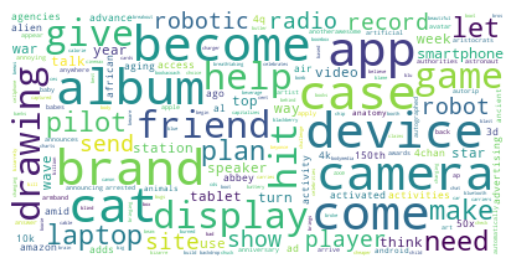

In [65]:
# Display the generated image with lower max_font_size
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=40,background_color = "white").generate(text1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> - The word cloud shows that specific keywords may be more informative and technological 

<Figure size 640x480 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

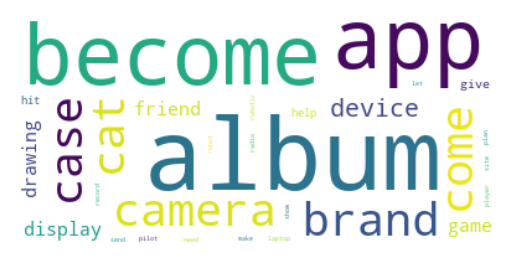

In [66]:
# Generate a word cloud image to see 
wordcloud = WordCloud(margin=19,
               random_state=1, background_color = "white").generate(text1)
plt.figure()                                        
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()